# Training Models

Closed-form solution -- a mathmatical equation to give us the answer directly.

The normal equation

*theta_hat* = (X.T \* X)^-1 \* X.T \* y

where *theta_hat* is the value of theta that minimizes cost function
y is the vector of targe values containing y^1 to y^m

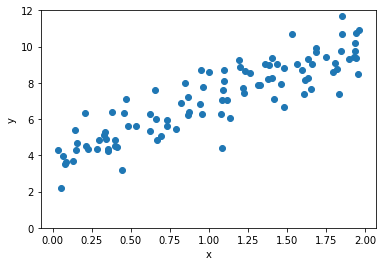

In [1]:
#Create some linear looking data
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

plt.scatter(x, y)
plt.ylim([0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
'''Linear regression model prediction:

y_predict = theta0*x0 + theta1*x1 + theta2*x2 ...

Therefore, assume x0 is 1 so that you get a theta0 (y-interecept)

We had hoped for theta0 to be 4 and theta1 to be 3. 
Close enough but the noise made it impossible to retrieve the exact paramters (see y equation).
'''
#apply the normal equation

X_b = np.c_[np.ones((100, 1)), x] #add x0 = 1 to each instance
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #normal function
print(theta_hat)


[[ 3.9113098 ]
 [ 3.10249849]]


In [3]:
X_new = np.array([[0], [2]]) # based on the span of points
print('X_new:\n', X_new)
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 =1 to each instance (0 and 2 span)
print('\nX_new with x0=1:\n', X_new_b)
y_predict = X_new_b.dot(theta_hat)
print('\n[[y0], [y1]]:\n', y_predict)

X_new:
 [[0]
 [2]]

X_new with x0=1:
 [[ 1.  0.]
 [ 1.  2.]]

[[y0], [y1]]:
 [[  3.9113098 ]
 [ 10.11630678]]


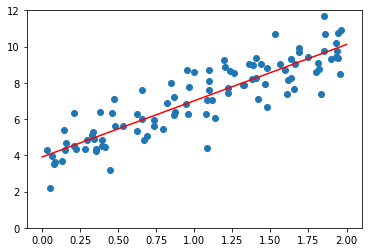

In [4]:
plt.plot(X_new, y_predict, 'r-')
plt.scatter(x,y)
plt.ylim([0,12])
plt.show()

y-intercept: [ 3.9113098] 
slope: [[ 3.10249849]]

X_new:
 [[0]
 [2]]

[[y0], [y1]]:
 [[  3.9113098 ]
 [ 10.11630678]]


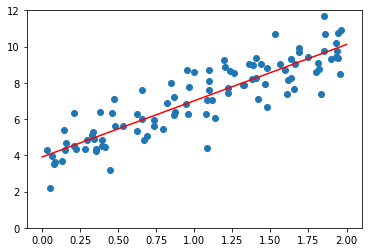

In [5]:
# The above code already is already built into a scikit package
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print('y-intercept:', lin_reg.intercept_, '\nslope:', lin_reg.coef_)
print('\nX_new:\n', X_new)

y_predict_lr = lin_reg.predict(X_new)

print('\n[[y0], [y1]]:\n', y_predict_lr)

plt.plot(X_new, y_predict_lr, 'r-')
plt.scatter(x,y)
plt.ylim([0,12])
plt.show()


## Computation complexity

The normal equation computes the inverse of x.T.dot(x) which is an nxn matrix.  The computation complexity of intverting such a matrix is typically about O(n^3); if you double the number of freature, you multiply the computation time by roungly a factor of 8 (2^3)

# Gradient Descent

In [6]:
eta = 0.1
n_iterations = 1000
m =100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[ 3.9113098 ]
 [ 3.10249849]]


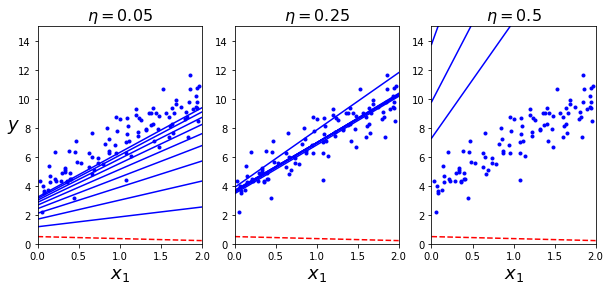

In [7]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.05)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.25, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

One of the reason the above can be slow is if there are a large dataset.  One way around this is not to use the whole dataset.

Stochastic Gradient Descent just picks a random instance in the training set at every iteration.  It also makes it possible to train on huge training sets isnce only one instance needs to be in memory at each iterations.



[[ 3.93162874]
 [ 3.11052192]]


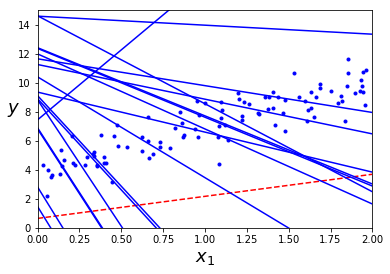

In [8]:
n_epochs = 50
t0, t1 = 5, 10

def learning_schedule(t):
    return t0 / (t + t1)

theta  = np.random.randn(2,1)
theta_path_sgd = []            

for epoch in range(n_epochs):
    for i in range (m):
        if epoch == 0 and i < 20:     
            y_predict = X_new_b.dot(theta)   
            style = "b-" if i > 0 else "r--"  
            plt.plot(X_new, y_predict, style) 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +1]
        yi = y[random_index:random_index +1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

print(theta)
plt.plot(x, y, "b.")  
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)  
plt.axis([0, 2, 0, 15])                             
# save_fig("sgd_plot")                              
plt.show()                                           

In [51]:
'''To perform linear regession using SGD with SciKit-Learn you can use the SDGRegressor class, 
which defaluts to optimizing the squared error cost function. 

The following code runs 50 epochs, starting with a learning rate of 0.1, using the defalut learning shcedule,
and it does not use oany regularization (penalty=None)'''

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol = None, penalty= None, eta0 = 0.1)
sgd_reg.fit(x, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[ 3.3648797] [-0.15664669]


## Mini-batch gradient descent



In [10]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
print(theta)

[[ 3.9061981 ]
 [ 3.10357077]]


### Compare each process

In [11]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


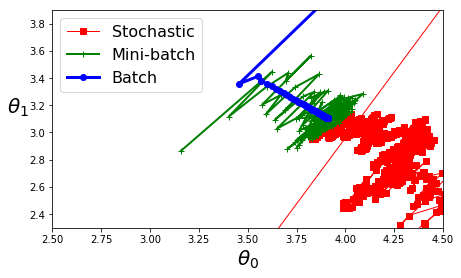

In [12]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
# save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

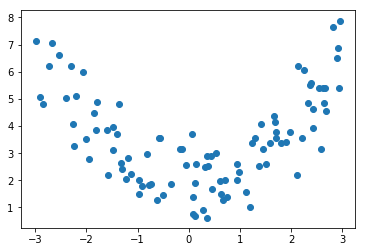

In [13]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + 2 + np.random.randn(m,1)
plt.scatter(x, y)
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(x)
print('first x value: ', x[0])
print('first x value and its square: ', X_poly[0])


first x value:  [ 2.38942838]
first x value and its square:  [ 2.38942838  5.709368  ]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('y-intercept: ', lin_reg.intercept_, 'coeficients', lin_reg.coef_)

y-intercept:  [ 1.9735233] coeficients [[-0.04961462  0.52577032]]


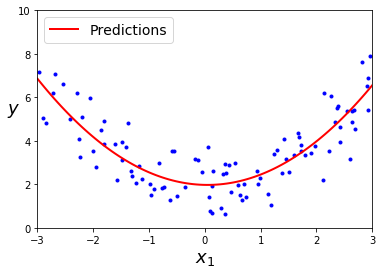

In [16]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(x, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

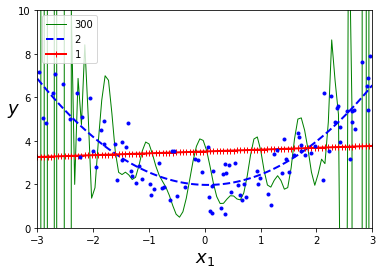

In [17]:
'''You can clearly overfit your data if you have a high degree polynomial

Below, you can see that a linear fit (red), 2nd order polynomical (blue), and a 300th order ploynomial (green)
can all be used to describe the datset.  But clearly, the 2nd order polynomial is the best fit.'''


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("high_degree_polynomials_plot")
plt.show()

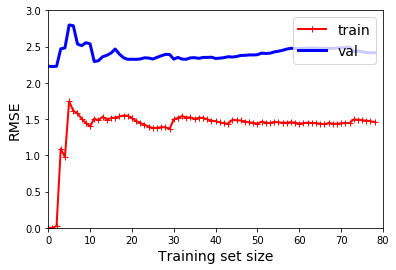

In [18]:
'''Another way is to look at learning curves: these are plots of the models performance 
on the training set and the validation set as a function of the training set size.'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
# save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

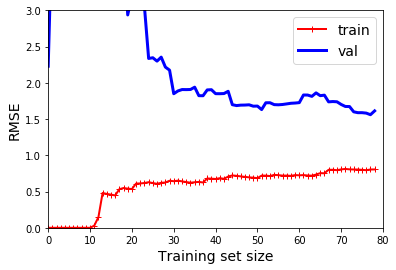

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3])           # not shown
# save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model: the few degrees of freedom it has, the hareder it will be for it to overfit the data.

For a linear model, regulatization is typically achieved by constraining the weights of the model. Three different typical ways of constraining the model:

1) Ridge Regression

2) Lasso Regression

3) Elastic Net

### Ridge Regression

The hyperparameter alpha controls how much you want to regularize the model.  If alpha = 0 then ridge regression is just Linear Regression.  If alpha is large, then all weights end up being close to zero and the result is a flat line going through the data's mean.

Note for polynomial regresion, how increasing alpha leads to a flatter (ie. less extreme, mor reasonable) predictions; this reduces the model's variance but increases bias.

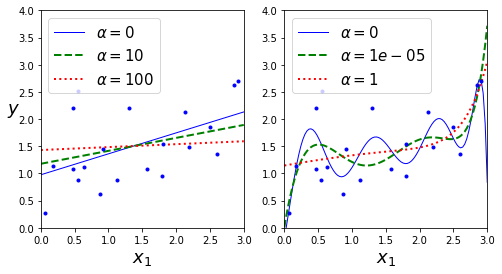

In [22]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))

# plot linear Ridge models of various alpha parameters.
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# plot polynomial Ridge models of various alpha paramters
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

# save_fig("ridge_regression_plot")
plt.show()

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver='cholesky')
ridge_reg.fit(X,y)
print(ridge_reg.predict([[1.5]]))

[[ 1.55071465]]


In [50]:
# Specifying L2 incdicates that you want SGD to add a regularization term to the cost function 
# equal to half the square of the l2 norm of the wieght vector (or simply Ridge Regression)
sgd_reg = SGDRegressor(max_iter = 5, tol = None, penalty = 'l2')
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[ 3.83996464]


## Lasso Regression

Least Absolute Shtrinkage and Selection Operator Regression (LASSO Regression)

Just like the Ridge Regression model, it adds a regularization term to the cost function, but it uses the l1 norm of the wieght vector instead of the l2 norm.

An imporant characterisitc of Lasso Regression is that it tends to completely eliminate the wieghts of the least import features (ie. set thm to zero).  For example, the dashed line in the right plot looks cubic (at least in the current run).  All the weights for the high-degree polynomial features are equal to zero.  In other words, Lasso Regresssion automatically performs feature selcetion and outputs a sparse model. 


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


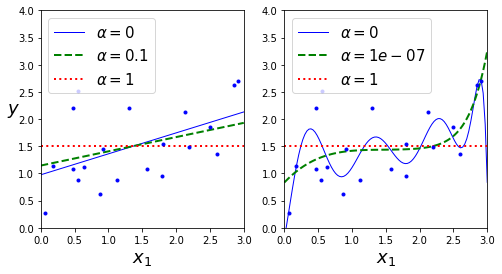

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))

# plot linear Ridge models of various alpha parameters.
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# plot polynomial Ridge models of various alpha paramters
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

# save_fig("ridge_regression_plot")
plt.show()

In [27]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))

[ 1.53788174]


In [49]:
# Specifying L1 incdicates that you want SGD to add a regularization term to the cost function 
# equal to half the square of the l1 norm of the wieght vector (or simply Lasso Regression)
sgd_reg = SGDRegressor(max_iter = 5, tol = None, penalty = 'l1')
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

[ 3.79797525]


## Compare between Lasso and Ridge regression

In [33]:
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

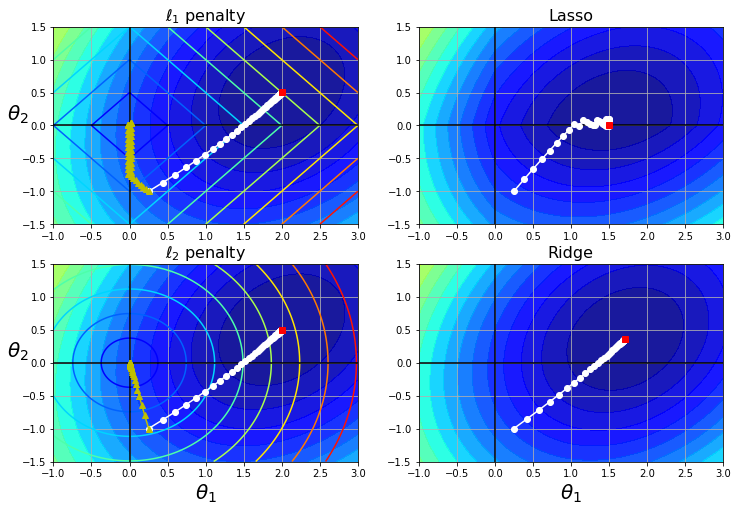

In [36]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

# save_fig("lasso_vs_ridge_plot")
plt.show()

On the top left plot, the backgournd contours (ellipses) respresent an unregularized MSE cost function (alpha = 0) and the white circles show the Batch Gradient Descent path with the cost function.  The foreground contours (diamonds) represent the l1 penalty and the triangles show the BDG path for thies penalty only (alpha goes to inf).
Notice how the triangle path first reaches theta1=0 then rolls down a gutter until it reaches theta2=0.

On the top right plot, the countours represent the same cost function plus an l1 penatly with alpha=0.5.  The global minimum is on the theta2=0 axis.  BGD first reaches theta2=0, then rolls down the gutter until it reaches the global minimum. 

The two bottom plots show the same thing but uses an l2 penalty instead.  The regularization minimum is clser to theta=0 than the unregularized minimum, but the wieghts do not get fully eliminated

On the Lasso cost function, the BGD path tends to bounce across the gutter toward the end. This is ecause the slope changes abruptly at theta2=0.  You need to gradually reduce the learngin rate in order toaactually converge to the global minimum.

## Elastic Net

Elastic Net is a middle ground between the Ridge and Lasso Regression models.  The regularization term is a simple mix of both Ridge and Lasso's regularization terms.  You can control the mix ratio (r). When r=0, Elastic net is equivalent to Ridge Regression, and when r=1, Elastic net is equivalen to Lasso Regression.

In [37]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

### So when do you use Linear Regression, Ridge, Lasso, or Elastic Net?

It is almost always preferable to have at least a littel bit of regulariztion, so generally you should avoid plain Linear Regression.  Ridge is a good defaul, but if yu suspect that only a few features area actually usefyl, you should prefer Lasso or Elastic Net since they tend to reduce teh useless eatures' weights down to zero.

In general, Elastic Net is preferred over Lasso,, since Lasso may behave erratically when the number of features is greatr than the number of training instances or whne several features are strongly correlated.

# Early Stopping

A very different way to regularize iterative learning algorightms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *Early Stopping*.

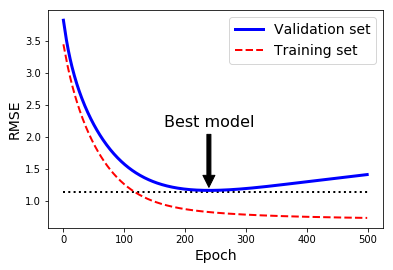

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")
plt.show()

A complex model being trainied using BGD. As the epochs go by,the alogorithm learns and its predictions error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.  However, after a while the validation error stops decreaseing and actually starts t go back up.

This indicates that the model has started to overfit the training data.  With early stopping you just stop training as soon as the validation error reaches the minimum.

With Stochastic adn Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better).

In [46]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
#warm_start = true allows it to continue where it left off, without starting from scratch

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
print('Best Epoch: ', best_epoch, '\nBest Model: ', best_model)

Best Epoch:  239 
Best Model:  SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=True)


# Logistic Regression

Some regression algorithms can be used for classification as well (and vice versa).  logistic Regression (also called Logit Regression) is commonbly used to esimate the probability that an instance belongs to a particular class.  If the estimated rpobability is greater than 50%, then the model predicsts that the instance belongs to that class or it predicst that it does not.  This makes it a binary classifier.

The logistic is a sigmoid function that outputs a number between 0 and 1 (see below).


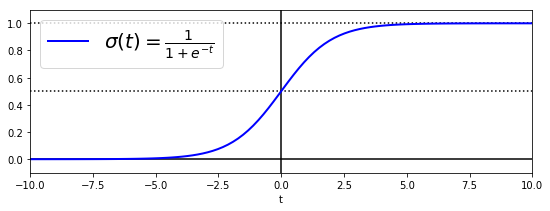

In [57]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# save_fig("logistic_function_plot")
plt.show()

In [58]:
# Load a datset to run Logistic Regression on

from sklearn import datasets
iris = datasets.load_iris()
list (iris.keys())

['DESCR', 'target', 'data', 'target_names', 'feature_names']

In [59]:
# Investigate this dataset

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [62]:
# Train dataset on Logistic Regressor
from sklearn.linear_model import LogisticRegression

x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

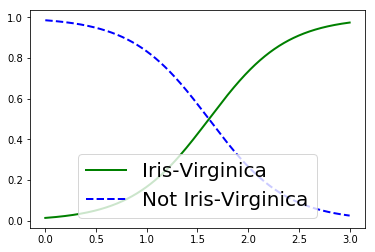

In [65]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.legend(loc="lower center", fontsize=20)

plt.show()

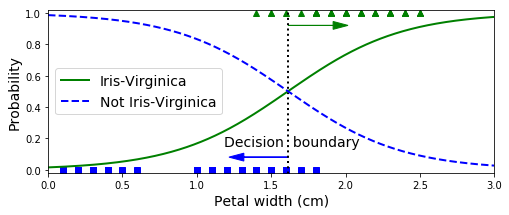

Descion boundry:  1.61561561562  cm


In [71]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

print('Descion boundry: ', decision_boundary[0], ' cm')

In [72]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

There is a descision boundry at 1.616 cm where both probabilites are equal to 50%. If the petal has a width higher than 1.6cm, the classifier will predict that the flower is an Iris_Virginica, or else it will predict that it is not (even if tht is not very confident)

Below, shows the same dataset, but with two features: Pedal width and length.

The dashed line represents the points where the mdoel estimates a 50% probability: this is the model's decision boundry. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right).  All the flowers beyond the top left line have over a 90% of being an Iris-Virginica according to the model.

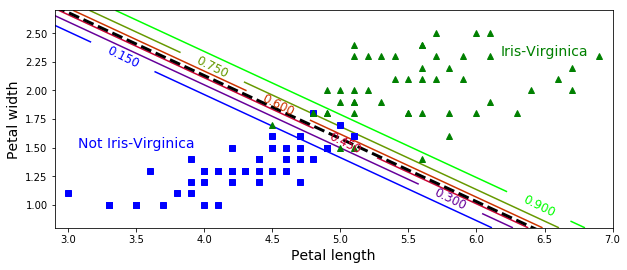

In [75]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax Regression

The logistic Regression model can be generalized to support multiple calsses directly, without having to train and combine mulitple binary classifiers (as discussed in Chapter 3).  This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is simple: when given an instance __x__, the Softmax Regression model first computes a score sk(__x__) for each class k, then estimates the probabilty of each class by applying the softmax function to the scores.

Note: That each class has its own dedicated paratmer vector theta_k.  All these ectors are typically stored as rows in paramter matrix Theta.

Once you have computed the score for every class fro the instance __x__, you can estimate the probility (p_k) that the instance belongs to class k by running the scores through the softmax function.

In [77]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
length  = 1
width = 1

print (softmax_reg.predict([[length,width]])) #which classifier (0: Iris-Setosa, 1: Iris-Versicolor, 2: Iris-Viginica)
print (softmax_reg.predict_proba([[length,width]])) # Highest present coresponds the class that is best

[0]
[[  9.99528196e-01   4.71803582e-04   4.27844025e-13]]


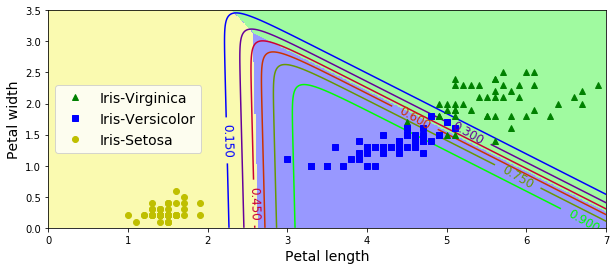

In [80]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()